#### Importing Libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [147]:
df = pd.read_csv('../Data/weekly_customer_complaints.csv', parse_dates=True, index_col='week')
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [148]:
df.tail()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2022-11-28,"4,444",29.89%,0,1,0
2022-12-05,"4,920",28.48%,1,0,0
2022-12-12,"5,342",28.89%,0,0,0
2022-12-19,"3,868",33.26%,0,0,0
2022-12-26,"3,607",37.35%,0,1,0


In [149]:
df.shape

(261, 5)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaints               261 non-null    object
 1   discount_rate            261 non-null    object
 2   small_commercial_event   261 non-null    int64 
 3   medium_commercial_event  261 non-null    int64 
 4   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.2+ KB


In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
small_commercial_event,261.0,0.226054,0.419078,0.0,0.0,0.0,0.0,1.0
medium_commercial_event,261.0,0.118774,0.324144,0.0,0.0,0.0,0.0,1.0
big_commercial_event,261.0,0.026820,0.161867,0.0,0.0,0.0,0.0,1.0


#### Checking for Null Values

In [152]:
df.isnull().sum()

complaints                 0
discount_rate              0
small_commercial_event     0
medium_commercial_event    0
big_commercial_event       0
dtype: int64

In [153]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq=None)

#### The data appears to be in weekly intervals, specifically starting on Monday.
#### The dates are consistently one week apart, it indicates that DataFrame is almost structured with a weekly frequency, starting from Monday.

In [154]:
#Ensuring weekly frequency...
#  Alter the frequency of a pandas Series with a time-based index to a weekly frequency, with each week starting on Monday
df = df.asfreq("W-Mon")

### Data Cleaning

In [155]:
df['complaints'] = df['complaints'].str.replace(',', '').astype(float)

In [156]:
df['discount_rate'] = df['discount_rate'].str.rstrip('%').astype('float')/100

In [157]:
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,0.3726,1,0,0
2018-01-08,1701.0,0.3538,0,0,0
2018-01-15,1711.0,0.3622,1,0,0
2018-01-22,1443.0,0.3833,1,0,0
2018-01-29,1397.0,0.3634,0,0,0


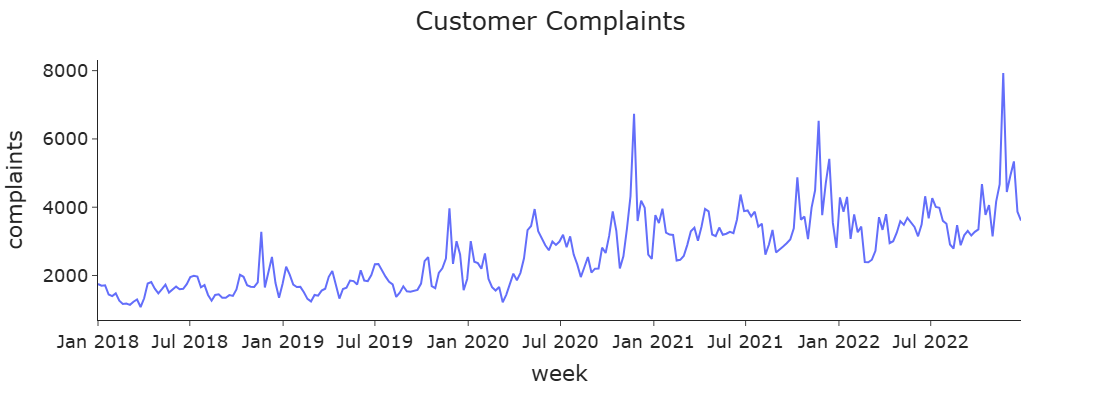

In [158]:
fig = px.line(df, x=df.index, y='complaints', labels={"Month": "Date"})
fig.update_layout(
        template="simple_white",font=dict(size=18),
        title_text="Customer Complaints", width=800, title_x=0.5, height=400)
fig.show()

### Insights from the Plot:
  
+ General Trend: The overall trend shows a gradual increase in customer complaints over the observed period. This indicates that customer dissatisfaction may be rising or that more customers are reaching out for support.
  
+ Seasonality: There may be noticeable seasonal patterns. There are significant spikes in complaints at certain points

#### Checking for Outliers

###  BoxPlot

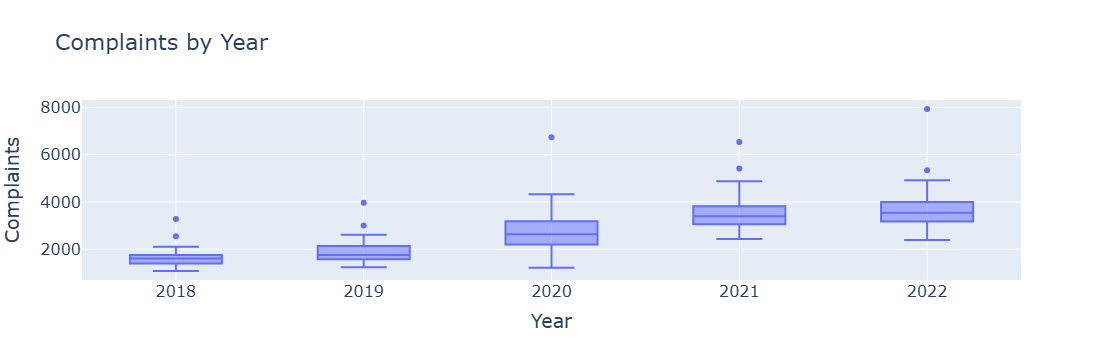

In [159]:
fig = px.box(df, x=df.index.year, y="complaints", title='Complaints by Year')
fig.update_layout( xaxis_title='Year', yaxis_title='Complaints',
    showlegend=False, 
    xaxis=dict(showgrid=True), 
    yaxis=dict(showgrid=True), font=dict(size=16))
fig.show()

In [160]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


outliers = detect_outliers(df, 'complaints')
outliers

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2020-11-23,6738.0,0.5920,0,0,0
2021-11-22,6530.0,0.3766,0,0,0
2022-11-21,7931.0,0.3759,0,0,0


#### It appears that in November, particularly around late November in 2020, 2021, and 2022, there were significant spikes in complaints.
  
+ This consistent increase in complaints during November could be driven by multiple factors, even though there are no marked commercial events during these weeks.

+ Since this data is from Chocolate Company some potential explanations specific to chocolate manufacturing:
  > Holiday Season Demand (Thanksgiving, Christmas, and other end-of-year festivities) which often 
    leads to a surge in demand for chocolates. This higher demand can stress production lines, 
    packaging, and delivery logistics.
  
  > Product Freshness and Shelf Life: Chocolates are sensitive to temperature changes, and as the 
    colder months begin, there might be more issues with how products are stored and shipped, 
    which could affect their freshness or quality upon arrival.
  
    + Complaints related to melted, stale, or spoiled chocolates could increase during this time.

  > Gifting and Bulk Orders

#### Scatter Plot: Checking if there any correlation between Discount Rate and Complaints.

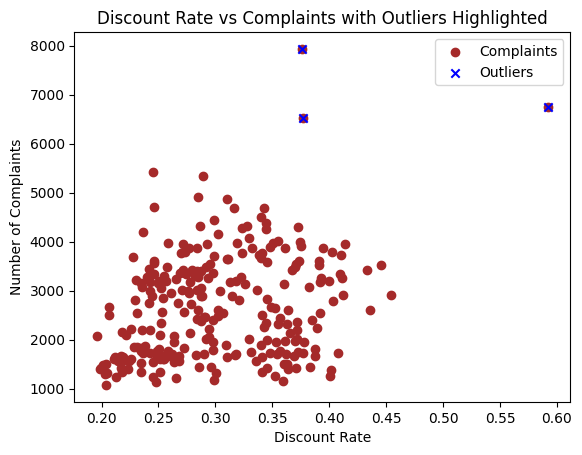

Correlation between discount rate and complaints: 0.28048360166870195


In [161]:
plt.scatter(df['discount_rate'], df['complaints'], color='brown', label='Complaints')
plt.scatter(outliers['discount_rate'], outliers['complaints'], color='blue', label='Outliers', marker='x')
plt.xlabel('Discount Rate')
plt.ylabel('Number of Complaints')
plt.title('Discount Rate vs Complaints with Outliers Highlighted')
plt.legend()
plt.show()

# Check for any correlation
correlation = df['discount_rate'].corr(df['complaints'])
print(f"Correlation between discount rate and complaints: {correlation}")

#### There is very less correlation(0.28) between number of complaints and discount rate.

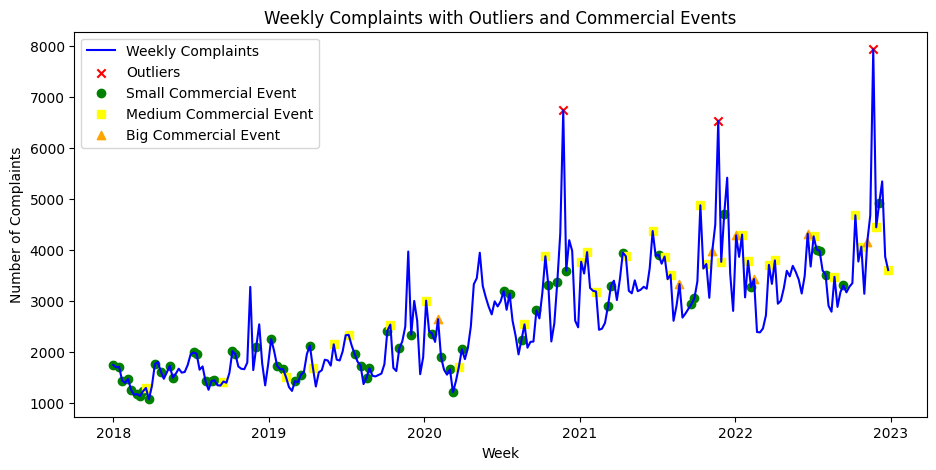

In [162]:
plt.figure(figsize=(11, 5))
plt.plot(df.index, df['complaints'], label='Weekly Complaints', color='blue')

# Highlight outliers
plt.scatter(outliers.index, outliers['complaints'], color='red', label='Outliers', marker='x')

# Mark commercial events
plt.scatter(df[df['small_commercial_event'] == 1].index, df[df['small_commercial_event'] == 1]['complaints'], 
            color='green', label='Small Commercial Event', marker='o')
plt.scatter(df[df['medium_commercial_event'] == 1].index, df[df['medium_commercial_event'] == 1]['complaints'], 
            color='yellow', label='Medium Commercial Event', marker='s')
plt.scatter(df[df['big_commercial_event'] == 1].index, df[df['big_commercial_event'] == 1]['complaints'], 
            color='orange', label='Big Commercial Event', marker='^')

plt.xlabel('Week')
plt.ylabel('Number of Complaints')
plt.title('Weekly Complaints with Outliers and Commercial Events')
plt.legend()
plt.show()

#### The events do not have raised in number of complaints, so there can be some other external factors also ,as in this data we are limited to only few external factors.

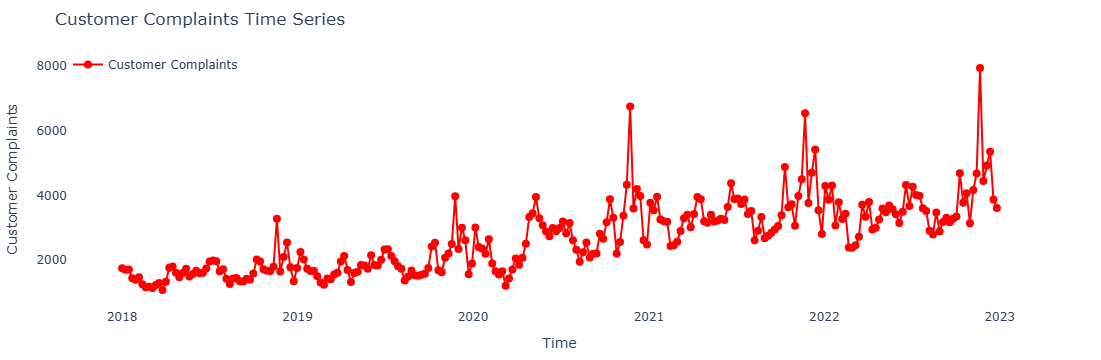

In [163]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['complaints'], 
                         mode='lines+markers',  # Adding markers
                         line=dict(color='red', width=2),  
                         marker=dict(symbol='circle', size=8),  
                         name='Customer Complaints'))  

fig.update_layout(title='Customer Complaints Time Series',  
                  xaxis=dict(title='Time'),  
                  yaxis=dict(title='Customer Complaints'),  
                  plot_bgcolor='rgba(0,0,0,0)', showlegend=True, legend=dict(x=0, y=1),  
                  hovermode='x unified', margin=dict(l=50, r=50, t=50, b=50),  
                  xaxis_showgrid=True,  yaxis_showgrid=True) 
fig.show()

#### From the above plot we can see that there is a seasonality in our series , we have peak in November of every year.

### Seasonal Decomposition

In [164]:
from statsmodels.tsa.seasonal import seasonal_decompose

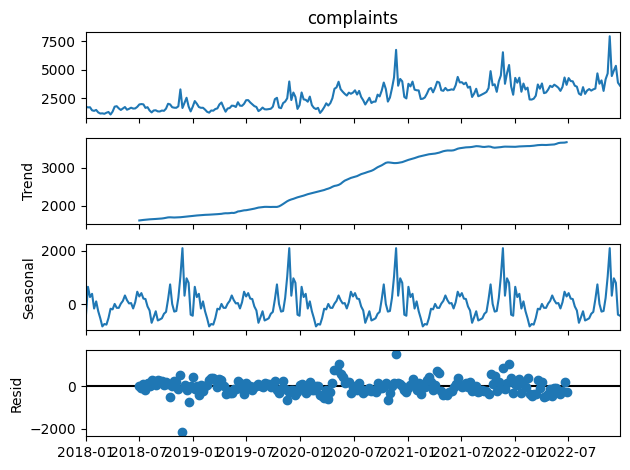

In [165]:
# Additive model
#The data is already structured with a weekly frequency.
result_add = seasonal_decompose(df['complaints'], 
                                model='additive', 
                                period=52) # (approximately 52 weeks in a year)
result_add.plot();

+ The additive decomposition shows that the overall trend is upward, with periodic spikes in complaints, possibly driven by recurring events.
+ Residuals show minimal variation, suggesting the additive model captures the trend and seasonality well.

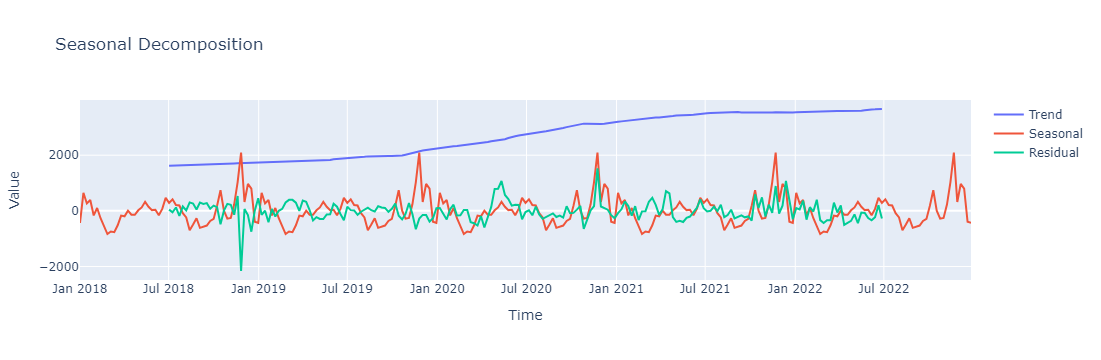

In [166]:
# Extracting components
trend = result_add.trend
seasonal = result_add.seasonal
residual = result_add.resid

#Plotly figure for visualization
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=trend, mode='lines', name='Trend'))
fig.add_trace(go.Scatter(x=df.index, y=seasonal, mode='lines', name='Seasonal'))
fig.add_trace(go.Scatter(x=df.index, y=residual, mode='lines', name='Residual'))

fig.update_layout(title='Seasonal Decomposition', xaxis_title='Time', yaxis_title='Value')
fig.show()

### Stationarity Test

#### Augmented Dickey-Fuller (ADF) Test

+ Statistical test used to determine whether a given time series is stationary or not.
  
+ Null Hypothesis (H₀): The series has a unit root (i.e., it is non-stationary).
+ Alternative Hypothesis (H₁): The series does not have a unit root (i.e., it is stationary).

In [167]:
from statsmodels.tsa.stattools import adfuller

In [168]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    dfoutput = {
        'Test Statistic': dftest[0],
        'p-value': dftest[1],
        '# Lags Used': dftest[2],
        'Number of Observations Used': dftest[3]
    }
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    return dfoutput

In [169]:
adf_result = adf_test(df['complaints'])
adf_result

Results of Dickey-Fuller Test:


{'Test Statistic': -0.9739536482307988,
 'p-value': 0.7626451909029052,
 '# Lags Used': 15,
 'Number of Observations Used': 245,
 'Critical Value (1%)': -3.4573260719088132,
 'Critical Value (5%)': -2.873410402808354,
 'Critical Value (10%)': -2.573095980841316}

1. ADF Statistic: (-0.97):  The test statistic is greater than the critical values at 1%, 5%, and 10% significance levels.
   
2. p-value (0.76):
   > The p-value is quite high (0.76 > 0.05), meaning we fail to reject the null hypothesis.
   
   > This suggests that the time series has a unit root, indicating that it is non-stationary.

#### Time series is non-stationary is confirmed.

### ACF and PACF Function plots

In [170]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### ACF PLOT

+ ACF is used to measure the correlation between a time series and its lagged versions over various lags.
+ By plotting the ACF values against different lags, we can analyze the autocorrelation structure of the time series and identify any significant patterns or dependencies.

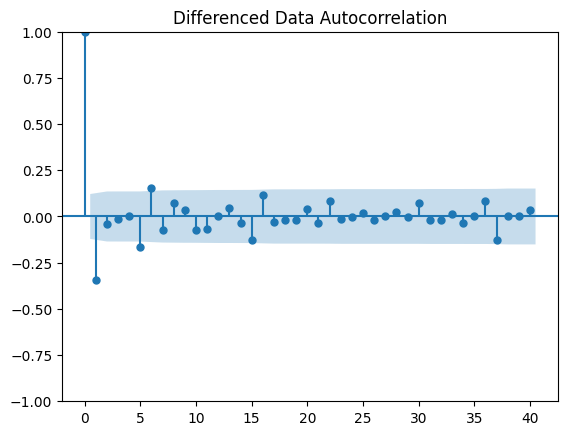

In [171]:
plot_acf(df['complaints'].diff().dropna(), lags=40, title='Differenced Data Autocorrelation')
plt.show()

1. The first spike at lag 1 is significant (close to 1), but the rest of the spikes are within the confidence interval.
2. This suggests that the differenced data is not highly autocorrelated beyond the first lag.

#### PACF Plot

+ The Partial Autocorrelation Function (PACF) is used in time series analysis to measure the correlation between a time series and its lagged versions while controlling for the values of the intervening lags.
+ PACF shows the direct correlation between a time series and its lagged values, after removing the effects of any intermediate lags.
+ It helps in identifying the order of an autoregressive (AR) model.

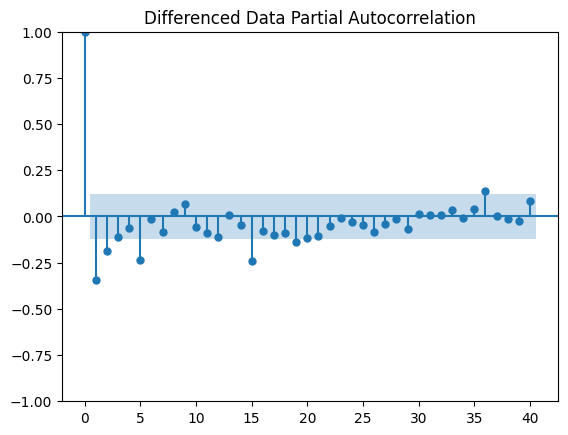

In [172]:
plot_pacf(df['complaints'].diff().dropna(), lags=40, title='Differenced Data Partial Autocorrelation')
plt.show()

1. The PACF shows a large significant spike at lag 1 and subsequent lags decrease rapidly within the confidence interval.

### Splitting the Data

In [173]:
# Defining split point
train_size = int(len(df) * 0.8)  # 80% train, 20% test

# Splitting the data
train, test = df[:train_size], df[train_size:]

# Target variable (endogenous)
y_train = train['complaints']
y_test = test['complaints']

In [176]:
train.head(3)

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,0.3726,1,0,0
2018-01-08,1701.0,0.3538,0,0,0
2018-01-15,1711.0,0.3622,1,0,0


In [177]:
train.tail()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2021-11-22,6530.0,0.3766,0,0,0
2021-11-29,3767.0,0.2696,0,1,0
2021-12-06,4698.0,0.2461,1,0,0
2021-12-13,5415.0,0.2454,0,0,0
2021-12-20,3541.0,0.2957,0,0,0


In [178]:
test.tail()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2022-11-28,4444.0,0.2989,0,1,0
2022-12-05,4920.0,0.2848,1,0,0
2022-12-12,5342.0,0.2889,0,0,0
2022-12-19,3868.0,0.3326,0,0,0
2022-12-26,3607.0,0.3735,0,1,0


In [179]:
print(f"Training data: {train.index.min()} to {train.index.max()}")
print(f"Test data: {test.index.min()} to {test.index.max()}")

Training data: 2018-01-01 00:00:00 to 2021-12-20 00:00:00
Test data: 2021-12-27 00:00:00 to 2022-12-26 00:00:00


### Forecasting

In [180]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Evaluation Metrics Function:
   
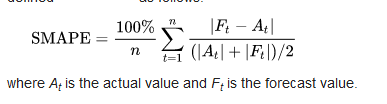


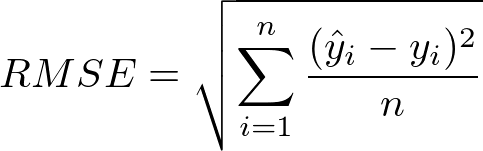

In [181]:
# Defining SMAPE calculation
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# General function for calculating model scores
def calculate_model_scores(model_name, y_test, forecast):
    mse = mean_squared_error(y_test, forecast)
    mae = mean_absolute_error(y_test, forecast)
    rmse = np.sqrt(mse)
    smape_value = smape(y_test, forecast)
    
    # Creating a DataFrame to store the scores
    model_scores = {
        'Model': [model_name],
        'MSE': [mse],
        'MAE': [mae],
        'RMSE': [rmse],
        'SMAPE': [smape_value]
    }
    
    return pd.DataFrame(model_scores)

In [182]:
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.metrics import smape

### 1. Holt-Winters Exponential Smoothing

+ Triple Exponential Smoothing, also known as Holt-Winters Exponential Smoothing, is an extension of exponential smoothing that takes into account seasonality in time series data.
  
+ This method is especially useful when  data exhibits both a trend and seasonal variations. It smooths the data in three components:

1. Level (the average value of the series)
2. Trend (the increase or decrease over time)
3. Seasonality (repeating patterns or cycles over a fixed period)

+ Here in our data, Multiplicative Seasonality is preffered because seasonal fluctuations are not constant and increase as the trend increases.

  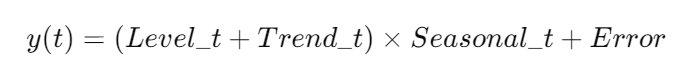    

In [183]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [40]:
# Multiplicative Model 
model_mult = ExponentialSmoothing(train['complaints'], 
                                  trend='add', 
                                  seasonal='mul', 
                                  seasonal_periods=52)  # 52 weeks in a year
hw_model = model_mult.fit()

In [219]:
# Forecast values for the test set
predictions = hw_model.forecast(steps=len(test))
predictions.head()

2021-12-27    3366.818868
2022-01-03    4674.643986
2022-01-10    4227.318110
2022-01-17    4262.832620
2022-01-24    3748.509513
Freq: W-MON, dtype: float64

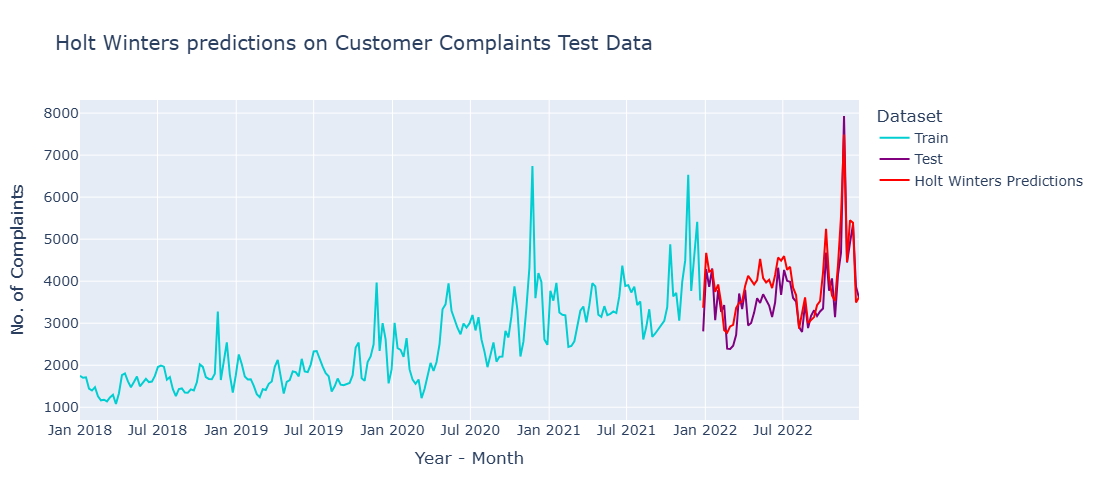

In [220]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train['complaints'],  mode='lines', 
                         name='Train',  line=dict(color='darkturquoise')))

fig.add_trace(go.Scatter(x=test.index, y=test['complaints'], 
                         mode='lines',  name='Test',  line=dict(color='purple')))

fig.add_trace(go.Scatter(x=test.index, y=predictions, 
                         mode='lines',  name='Holt Winters Predictions',  line=dict(color='red')))

fig.update_layout(
    title='Holt Winters predictions on Customer Complaints Test Data', xaxis_title='Year - Month', 
    yaxis_title='No. of Complaints', legend_title='Dataset', font=dict(size=14), width=1100, height=500)
fig.show()

In [43]:
# Model Performance
model_name = 'Holt Winters'
scores_df = calculate_model_scores(model_name, y_test, predictions)
scores_df

,Model,MSE,MAE,RMSE,SMAPE
0,Holt Winters,241901.142567,406.871743,491.834467,11.055096


+ The Holt-Winters method has done reasonably well, especially considering that the model can handle seasonality (which is present in our data).
+ However, the MSE and RMSE suggest that there are instances where the model prediction deviates significantly from the actual values.
+ These large deviations could be linked to outliers, such as spikes in complaints.

### 2. SARIMA Model

In [44]:
sarima_model = pm.ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 52)) 
sarima_model.fit(y_train)
sarima_model.summary()

C:\Users\Darrin DeYoung\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  208
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1168.129
Date:                            Sat, 12 Oct 2024   AIC                           2348.258
Time:                                    19:51:45   BIC                           2366.518
Sample:                                01-01-2018   HQIC                          2355.675
                                     - 12-20-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1155      2.621      0.426      0.670      -4.022       6.253
ar.L1          0.3752      0.065      5.799      0.000       0.248       0.502
ma.L1         -0.9331      0.043    -21.580      0.000      -1.018      -0.848
ar.S.L52       0.4815      1.057      0.456      0.649      -1.590       2.553
ma.S.L52      -0.7263      1.311     -0.554      0.580      -3.296       1.843
sigma2      1.988e+05   5.31e+04      3.746      0.000    9.48e+04    3.03e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               307.46
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             1.44
Prob(H) (two-sided):                  0.82   Kurtosis:                         9.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
n_periods = len(y_test)  # Number of periods in the test set
forecast_sarima, conf_int = sarima_model.predict(n_periods=n_periods, return_conf_int=True)

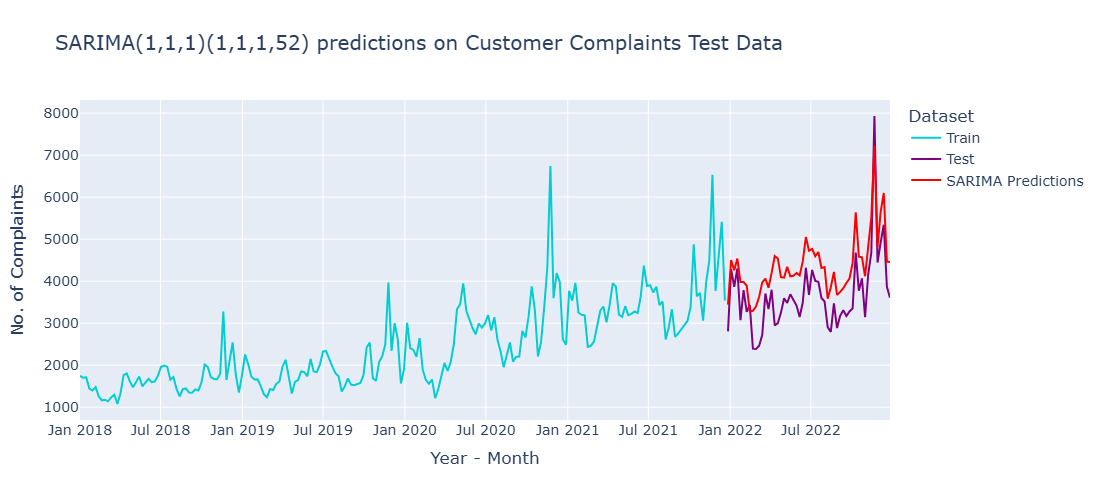

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train['complaints'], mode='lines',name='Train',line=dict(color='darkturquoise')))

fig.add_trace(go.Scatter(x=test.index, y=test['complaints'], mode='lines',name='Test',line=dict(color='purple')))

fig.add_trace(go.Scatter(x=test.index, y=forecast_sarima, mode='lines', name='SARIMA Predictions',line=dict(color='red')))

fig.update_layout(
    title='SARIMA(1,1,1)(1,1,1,52) predictions on Customer Complaints Test Data', xaxis_title='Year - Month', 
    yaxis_title='No. of Complaints', legend_title='Dataset', font=dict(size=14), width=1100, height=500)
fig.show()

In [47]:
# Model Performance
model_name = 'SARIMA(1,1,1)(1,1,1,52)'
sarima_scores_df = calculate_model_scores(model_name, y_test, forecast_sarima)
scores_df = pd.concat([scores_df, sarima_scores_df], ignore_index=True)
scores_df

,Model,MSE,MAE,RMSE,SMAPE
0,Holt Winters,241901.142567,406.871743,491.834467,11.055096
1,"SARIMA(1,1,1)(1,1,1,52)",634830.003937,737.021308,796.762200,19.195027


### Cross Validation using TimeSeriesSplit

In [48]:
from sklearn.model_selection import TimeSeriesSplit

In [49]:
tscv = TimeSeriesSplit(n_splits=5)  

In [50]:
smape_scores = []
y = df['complaints']

for train_index, test_index in tscv.split(y):
    # Split into training and test sets
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit SARIMA model
    sarima_model = pm.ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    sarima_model.fit(y_train)
    
    # Forecast the same length as the test set
    n_periods = len(y_test)
    forecast, conf_int = sarima_model.predict(n_periods=n_periods, return_conf_int=True)
    
    # Calculate SMAPE for the test set
    smape_score = 100 * (abs(forecast - y_test) / ((abs(y_test) + abs(forecast)) / 2)).mean()
    smape_scores.append(smape_score)

average_smape = sum(smape_scores) / len(smape_scores)
print(f"Average SMAPE across folds: {average_smape:.3f}%")

C:\Users\Darrin DeYoung\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Darrin DeYoung\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Average SMAPE across folds: 19.954%


+ An average SMAPE of 19.954% across cross-validation folds indicates that our SARIMA model is performing reasonably well, with an average percentage error of about 20%.
  
+ This means, on average, the forecasted values are off by roughly 20% from the actual values across all test sets.

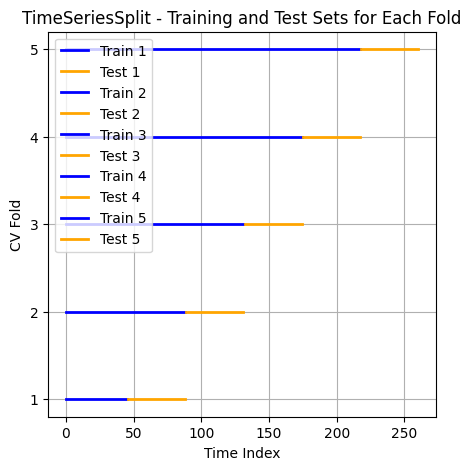

In [51]:
# Plotting the splits
plt.figure(figsize=(5, 5))

for i, (train_index, test_index) in enumerate(tscv.split(y)):
    plt.plot(train_index, [i + 1] * len(train_index), label=f'Train {i+1}', color='blue', lw=2)
    plt.plot(test_index, [i + 1] * len(test_index), label=f'Test {i+1}', color='orange', lw=2)

# Formatting the plot
plt.yticks(np.arange(1, tscv.get_n_splits() + 1))
plt.ylabel("CV Fold")
plt.xlabel("Time Index")
plt.title("TimeSeriesSplit - Training and Test Sets for Each Fold")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

1. The blue segments represent the training data, which expands with each fold.
   
2. The orange segments represent the test data, which is sequentially ahead of the training data.

+ As we move through each fold, the training set grows (as past data accumulates), and the test set shifts forward. This setup preserves the temporal structure of the data, which is crucial for time series forecasting.

In [52]:
smape_scores

[32.546466858973524,
 22.706087301051,
 12.1630182784331,
 22.263572816707462,
 10.090990002472711]

### 3. SARIMAX

1. The Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors (SARIMAX) model is a powerful time series forecasting technique that extends the traditional ARIMA model to account for seasonality and external factors.
   
2. Exogenous Regressors: These variables are factors outside the time series that might influence the forecast (e.g., economic indicators, temperature, marketing efforts, etc.)

#### In our dataset, potential exogenous variables like:

+ discount_rate (e.g., promotional rates that might influence complaints)
+ small_commercial_event
+ medium_commercial_event
+ big_commercial_event

#### Here, I will use only discount_rate as the exogenous variable.

In [174]:
# Exogenous variables
exog_train = train[['discount_rate']]
exog_test = test[['discount_rate']]

In [175]:
print(f"y_train size: {y_train.shape}")
print(f"exog_train size: {exog_train.shape}")
print(f"y_test size: {y_test.shape}")
print(f"exog_test size: {exog_test.shape}")

y_train size: (208,)
exog_train size: (208, 1)
y_test size: (53,)
exog_test size: (53, 1)


In [58]:
sarimax_model = pm.ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 1, 52))

# Fit the model
sarimax_model.fit(y_train, exogenous=exog_train)

# Forecast
n_periods = len(y_test)
sarimax_forecast, conf_int = sarimax_model.predict(n_periods=n_periods, exogenous=exog_test, return_conf_int=True)

C:\Users\Darrin DeYoung\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



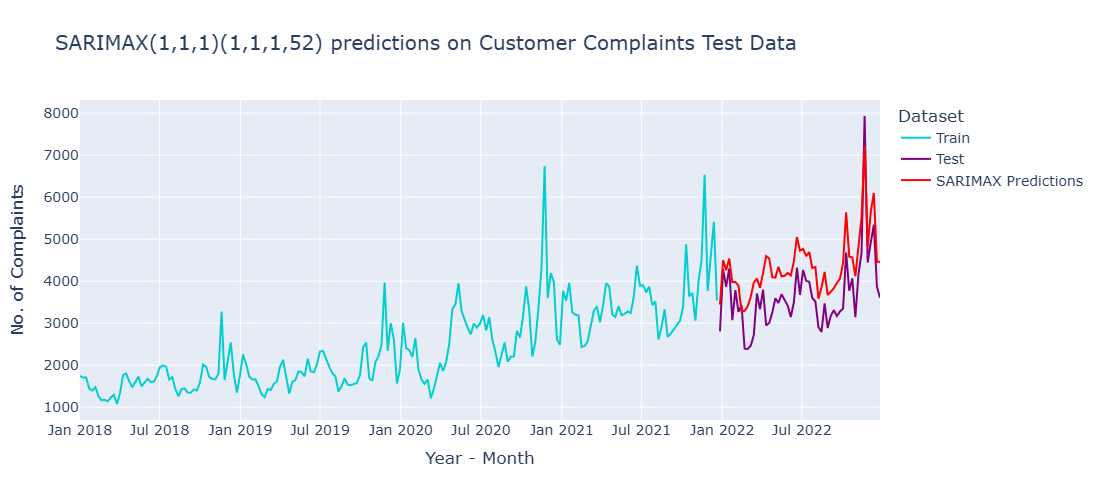

In [59]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train['complaints'],  mode='lines', 
                         name='Train',  line=dict(color='darkturquoise')))

fig.add_trace(go.Scatter(x=test.index, y=test['complaints'], 
                         mode='lines',  name='Test',  line=dict(color='purple')))

fig.add_trace(go.Scatter(x=test.index, y=sarimax_forecast, 
                         mode='lines',  name='SARIMAX Predictions',  line=dict(color='red')))

fig.update_layout(
    title='SARIMAX(1,1,1)(1,1,1,52) predictions on Customer Complaints Test Data', xaxis_title='Year - Month', 
    yaxis_title='No. of Complaints', legend_title='Dataset', font=dict(size=14), width=1100, height=500)
fig.show()

In [61]:
# Model Performance
model_name = 'SARIMAX(1,1,1)(1,1,1,52)'
sarimax_scores_df = calculate_model_scores(model_name, y_test, sarimax_forecast)
scores_df = pd.concat([scores_df, sarimax_scores_df], ignore_index=True)
scores_df

,Model,MSE,MAE,RMSE,SMAPE
0,Holt Winters,241901.142567,406.871743,491.834467,11.055096
1,"SARIMA(1,1,1)(1,1,1,52)",634830.003937,737.021308,796.762200,19.195027
2,"SARIMAX(1,1,1)(1,1,1,52)",634830.003937,737.021308,796.762200,19.195027


+ SMAPE: A value of 10% is often considered good in time series forecasting, indicating that the model provides reasonably accurate forecasts relative to the actual complaints.

### 4. AUTO ARIMA

+ Auto ARIMA (or Auto SARIMA) is a method that automatically identifies the optimal parameters for a Seasonal ARIMA model, which is useful for time series forecasting, especially when dealing with seasonality.
+ It streamlines the process of selecting the best ARIMA model by automating the steps of parameter selection (p, d, q) and seasonal parameters (P, D, Q, s).

In [75]:
#!pip install pmdarima

In [62]:
import pmdarima as pm
from pmdarima import auto_arima

In [63]:
auto_arima_model = pm.auto_arima(y_train, 
                                  seasonal=True, m=52, exogenous=exog_train,
                                  stepwise=True, trace=True, 
                                  error_action='ignore', suppress_warnings=True)

# Model summary
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=28.30 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3240.632, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=inf, Time=6.98 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=inf, Time=6.80 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=3238.677, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=inf, Time=4.86 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=inf, Time=6.97 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=3163.619, Time=8.34 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=inf, Time=70.09 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=inf, Time=56.74 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=inf, Time=34.30 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=3161.131, Time=23.91 sec
 ARIMA(1,1,0)(2,0,0)[52] intercept   : AIC=3141.030, Time=29.00 sec
 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=inf, Time=69.33 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=3141.503, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  208
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1552.942
Date:                             Sat, 12 Oct 2024   AIC                           3115.884
Time:                                     20:39:56   BIC                           3132.547
Sample:                                 01-01-2018   HQIC                          3122.622
                                      - 12-20-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4085      0.064      6.336      0.000       0.282       0.535
ar.L2          0.1117      0.082      1.365      0.172      -0.049       0.272
ma.L1         -0.9357      0.039    -24.296      0.000      -1.011      -0.860
ar.S.L52       0.6380      0.036     17.864      0.000       0.568       0.708
sigma2      1.682e+05   8356.537     20.133      0.000    1.52e+05    1.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               453.47
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.60   Skew:                             1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
auto_arima_forecast, conf_int = auto_arima_model.predict(n_periods=len(y_test), return_conf_int=True)
auto_arima_forecast.head()

2021-12-27    3548.661111
2022-01-03    4292.711102
2022-01-10    4124.665989
2022-01-17    4375.801244
2022-01-24    3917.437835
Freq: W-MON, dtype: float64

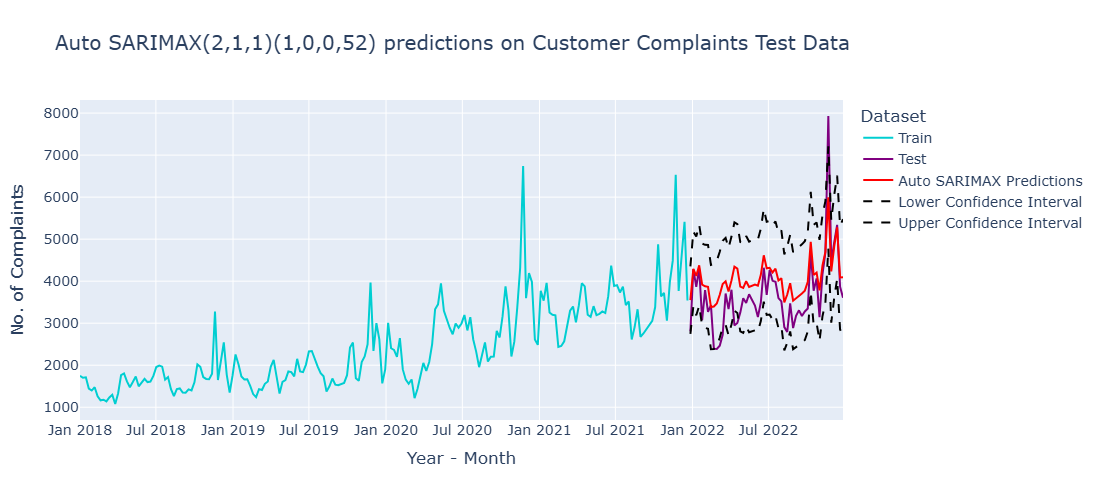

In [67]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train['complaints'],  
                         mode='lines', name='Train',  
                         line=dict(color='darkturquoise')))

fig.add_trace(go.Scatter(x=test.index, y=test['complaints'], 
                         mode='lines', name='Test',  
                         line=dict(color='purple')))

fig.add_trace(go.Scatter(x=test.index, y=auto_arima_forecast, 
                         mode='lines', name='Auto SARIMAX Predictions',  
                         line=dict(color='red')))

# Adding confidence interval - lower bound
fig.add_trace(go.Scatter(x=test.index, y=conf_int[:, 0], 
                         mode='lines', name='Lower Confidence Interval',  
                         line=dict(color='black', dash='dash')))

# Adding confidence interval - upper bound
fig.add_trace(go.Scatter(x=test.index, y=conf_int[:, 1], 
                         mode='lines', name='Upper Confidence Interval',  
                         line=dict(color='black', dash='dash')))

fig.update_layout(
    title='Auto SARIMAX(2,1,1)(1,0,0,52) predictions on Customer Complaints Test Data',
    xaxis_title='Year - Month', yaxis_title='No. of Complaints',
    legend_title='Dataset', font=dict(size=14), width=1100, height=500)
fig.show()

In [68]:
# Model Performance
model_name = 'Auto SARIMAX(2,1,1)(1,0,0,52)'
auto_sarimax_scores_df = calculate_model_scores(model_name, y_test, auto_arima_forecast)
scores_df = pd.concat([scores_df, auto_sarimax_scores_df], ignore_index=True)
scores_df

,Model,MSE,MAE,RMSE,SMAPE
0,Holt Winters,241901.142567,406.871743,491.834467,11.055096
1,"SARIMA(1,1,1)(1,1,1,52)",634830.003937,737.021308,796.762200,19.195027
2,"SARIMAX(1,1,1)(1,1,1,52)",634830.003937,737.021308,796.762200,19.195027
3,"Auto SARIMAX(2,1,1)(1,0,0,52)",410234.167172,503.723059,640.495251,13.789988


### Conclusion

#### 1. Best Performing Model:

+ #####  The Holt-Winters model has the lowest MSE, MAE, RMSE, and SMAPE, indicating it performed the best among the models evaluated. The metrics suggest it is a good fit for our data.

+ #####  The Auto SARIMAX model (2,1,1)(1,0,0,52) shows a significant improvement over the basic SARIMA and SARIMAX models, but still does not outperform the Holt-Winters model.

#### 2. Model Comparisons:

+ ##### Both SARIMA and SARIMAX models yield identical results, suggesting that the inclusion of exogenous variables did not improve the fit for the parameters tested.

+ ##### Auto SARIMAX shows better performance than the standard SARIMA and SARIMAX models, indicating that automated tuning of parameters can lead to improvements in predictive accuracy.


#### 3. SMAPE:

+ ##### The Symmetric Mean Absolute Percentage Error (SMAPE) for the Holt-Winters model is the lowest at 11.06%, indicating that it has the best relative accuracy for forecasting as compared to the actual values.
+  A lower SMAPE is better as it indicates smaller percentage errors.

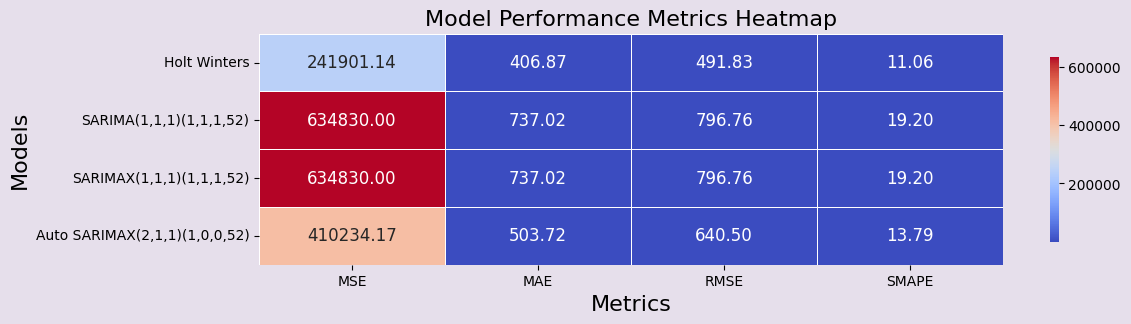

In [96]:
metric_scores = {
    "Model": [
        "Holt Winters","SARIMA(1,1,1)(1,1,1,52)",
        "SARIMAX(1,1,1)(1,1,1,52)","Auto SARIMAX(2,1,1)(1,0,0,52)"],
    "MSE": [241901.142567,634830.003937,634830.003937,410234.167172],
    "MAE": [406.871743, 737.021308, 737.021308, 503.723059 ],
    "RMSE": [491.834467, 796.762200, 796.762200, 640.495251],
    "SMAPE": [ 11.055096, 19.195027,19.195027,13.789988]
}

scores_df = pd.DataFrame(metric_scores)
scores_df.set_index('Model', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 3), facecolor='#e6dfeb')
sns.heatmap(data=scores_df, cmap='coolwarm', annot=True,
    fmt='.2f', annot_kws={"size": 12}, cbar_kws={"shrink": 0.8}, linewidths=0.5, linecolor='white')

plt.xlabel('Metrics', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.title('Model Performance Metrics Heatmap', fontsize=16)
plt.show()

#### Saving Models

In [69]:
import pickle

In [72]:
with open('../Saved_Models/auto_arima.pkl', 'wb') as file:
    pickle.dump(auto_arima_model, file)

In [73]:
with open('../Saved_Models/holt_winters.pkl', 'wb') as file:
    pickle.dump(hw_model, file)